In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
file_path = 'C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5'




In [2]:
with h5py.File(file_path, 'r') as f:
    
    Teff = f['grid/tracks/track00042/Teff'][:]     # Effective Temperature array
    LPhot = f['grid/tracks/track00042/LPhot'][:]   # Photospheric Luminosity array

#LPhot = LPhot * 3.828 * 10**26  # Converting into watts
print("Teff:", Teff[:5])  # Print the first few values
print("LPhot:", LPhot[:5])




Teff: [7680.936644 7680.090155 7679.618571 7678.573314 7676.255966]
LPhot: [21.803729   21.80398366 21.80403121 21.80398362 21.803526  ]


In [3]:
# Initialize lists to hold the age, Teff, and LPhot data for all selected tracks
age_data_list = []
Teff_data_list = []
LPhot_data_list = []

# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    grid = hdf['grid']
    tracks = grid['tracks']
    
    selected_tracks = []
    
    for track_name in tracks:
        track = tracks[track_name]
        
        # Check for the criteria on 'massini' and 'alphaMLT'
        if 'massini' in track and track['massini'].size > 0:
            massini_value = track['massini'][()][0]
        else:
            massini_value = 0  # Outside our range
        
        if 'alphaMLT' in track and track['alphaMLT'].size > 0:
            alphaMLT_value = track['alphaMLT'][()][0]
        else:
            alphaMLT_value = 0  # Outside our range
        
        if 1.0 < massini_value < 1.1 and 1.785 < alphaMLT_value < 1.795:
            selected_tracks.append(track)
            
            # Access and collect the data for each track
            teff_data = track['Teff'][:] 
            luminosity_data = track['LPhot'][:]
            age_data = track['age'][:]
            
            # Append to lists
            age_data_list.append(age_data)
            Teff_data_list.append(teff_data)
            LPhot_data_list.append(luminosity_data)

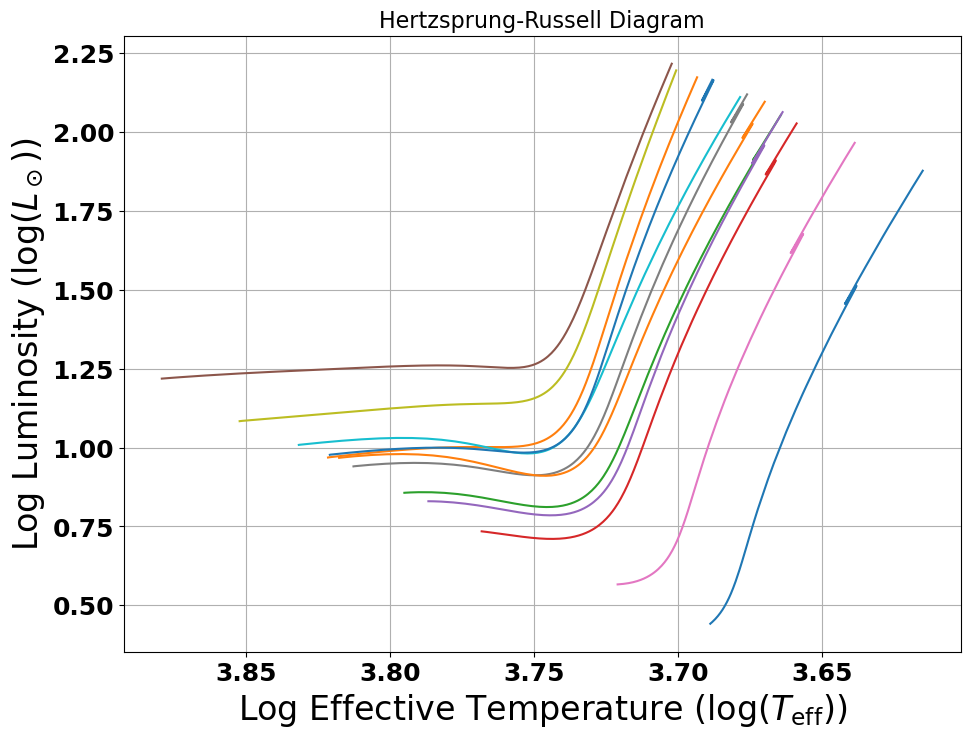

In [11]:
plt.rcParams["axes.labelsize"] = 24  # Labels size
plt.rcParams["axes.titlesize"] = 22  # Title size
plt.rcParams["legend.fontsize"] = 22  # Legend size
plt.rcParams["xtick.labelsize"] = 18  # X-axis tick size
plt.rcParams["ytick.labelsize"] = 18  # Y-axis tick size
plt.rcParams["font.weight"] = 'bold'  # Bold text

# Create a figure and axis
plt.figure(figsize=(10.8, 8))

# Loop over each selected track
for age_data, Teff_data, LPhot_data in zip(age_data_list, Teff_data_list, LPhot_data_list):
    # Convert Teff and LPhot to log scale
    log_Teff = np.log10(Teff_data)  # log(Teff)
    log_LPhot = np.log10(LPhot_data)  # log(LPhot)
    
    # Plot the track in the HR diagram (age is not used for plotting directly, but it could be used for color coding)
    plt.plot(log_Teff, log_LPhot)  # Use last age as a label

# Add labels and title
plt.xlabel("Log Effective Temperature ($\log(T_\mathrm{eff})$)")
plt.ylabel("Log Luminosity ($\log(L_\odot)$)")
plt.title('Hertzsprung-Russell Diagram', fontsize=16)
plt.gca().invert_xaxis()
# Optionally, add a legend


# Show the plot
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (12,) + inhomogeneous part.

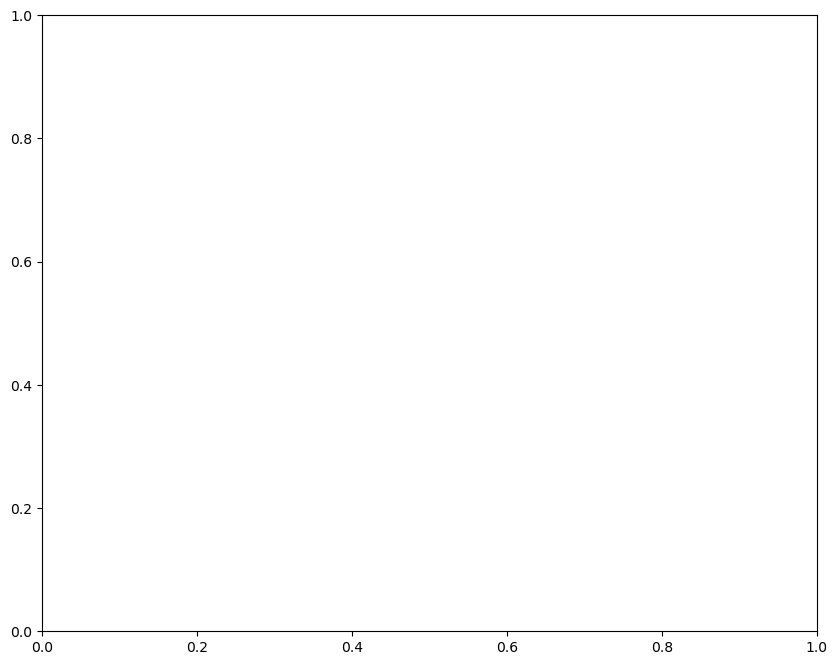

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(Teff_data_list, LPhot_data_list, cmap='inferno', s=1)

plt.xlabel("Effective Temperature (K)")
plt.ylabel("Luminosity (L☉)")
plt.yscale('log')
plt.gca().invert_xaxis()  # Invert x-axis for HR diagram convention
plt.title("HR Diagram (Teff vs Luminosity)")
plt.savefig('C:\\Users\\Dell\\Documents\\Year 4 project\\track00001.png')
plt.show()


In [82]:
all_Teff = []
all_LPhot = []

# Open the HDF5 file and iterate over each track this time 
with h5py.File(file_path, 'r') as f:
    for i in range(1, 10):  
        track_number = f"{i:05d}" 
        print(track_number)
        path_temp = f"grid/tracks/track{track_number}/Teff"
        path_lum = f"grid/tracks/track{track_number}/LPhot"
        Teff = f[path_temp][:]
        LPhot = f[path_lum][:]
        all_Teff.append(Teff)  
        all_LPhot.append(LPhot)









    
    
   
         

   






00001
00002
00003
00004
00005
00006
00007
00008
00009


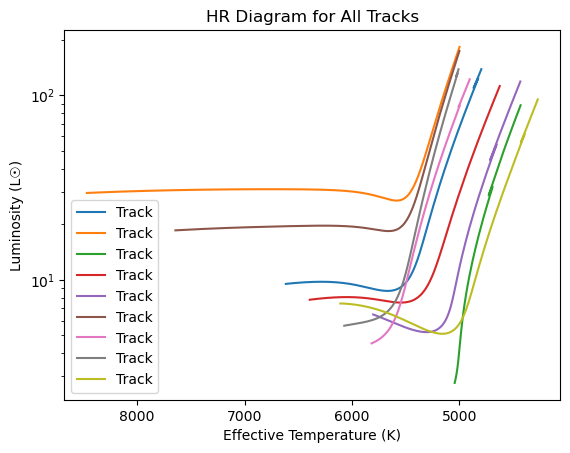

In [86]:
# Now plot all data on the same graph

for Teff, LPhot in zip(all_Teff, all_LPhot):
    plt.plot(Teff, LPhot, linestyle='-', markersize=1, label='Track')


plt.xlabel("Effective Temperature (K)")
plt.ylabel("Luminosity (L☉)")
plt.yscale('log')
plt.gca().invert_xaxis()  # Invert x-axis for HR diagram convention
plt.title("HR Diagram for All Tracks")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


12


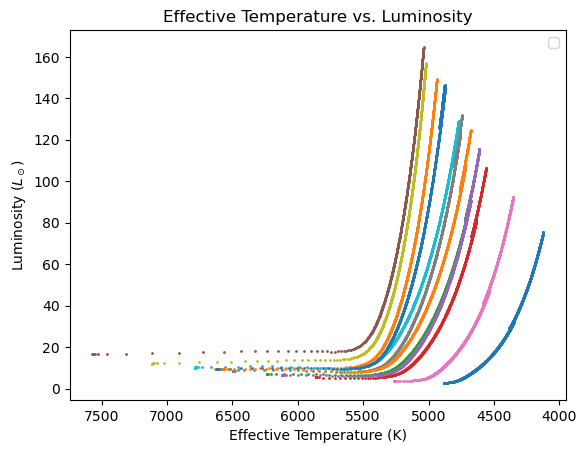

In [100]:
with h5py.File(file_path, 'r') as hdf:

    '''
    We want to make a HR diagram plot with a sample of mass (1.0 < M < 1.1) 
    solar masses, and alpha_mlt initially set to ~1.79.
    '''

    # Navigate through Grid -> tracks -> track00001
    grid = hdf['grid']
    tracks = grid['tracks']

    # Initialize a list to hold the tracks that meet our desired criteria
    selected_tracks = []

    for track_name in tracks:

        track = tracks[track_name]

        # Check if 'massini' dataset exists and is not empty
        if 'massini' in track and track['massini'].size > 0:
            massini_value = track['massini'][()][0]  # Get the first element if it exists
        else:
            massini_value = 0  # Put outside of our desired range so it isn't selected

        # Check if 'alphaMLT' dataset exists and is not empty
        if 'alphaMLT' in track and track['alphaMLT'].size > 0:
            alphaMLT_value = track['alphaMLT'][()][0]  # Get the first element if it exists
        else:
            alphaMLT_value = 0  # Put outside of our desired range so it isn't selected

        if 'FeHini' in track and track['FeHini'].size > 0:
            FeHini_value = track['FeHini'][()][0]  # Get the first element if it exists
        else:
            FeHini_value = 0  # Put outside of our desired range so it isn't selected

        if 'alphaFe' in track and track['alphaFe'].size > 0:
            alphaFe_value = track['alphaFe'][()][0]  # Get the first element if it exists
        else:
            alphaFe_value = 0  # Put outside of our desired range so it isn't selected

        if 'yini' in track and track['yini'].size > 0:
            yini_value = track['yini'][()][0]  # Get the first element if it exists
        else:
            yini_value = 0  # Put outside of our desired range so it isn't selected

        if 'eta' in track and track['eta'].size > 0:
            eta_value = track['eta'][()][0]  # Get the first element if it exists
        else:
            eta_value = 0  # Put outside of our desired range so it isn't selected

# If graveyard: 0 < FeHini_value < 0.1, 0 < alphaFe_value < 0.01, 0.26 < yini_value < 0.265, 0 < eta_value < 0.05

        if all([
            1.0 < massini_value < 1.1,
            1.785 < alphaMLT_value < 1.795
        ]):  
            selected_tracks.append(track)
            
    print(len(selected_tracks)) # checking how many tracks are within requirements 

    # Now for the fun bit, plot the HR diagrams for each of the selected tracks

    for track in selected_tracks:
        # Access effective temperature and luminosity as np arrays
        teff_data = track['Teff'][:] 
        luminosity_data = track['LPhot'][:] 

        track_name = track.name.rsplit('/', 1)[-1]  # Split from the right, keep the last part

        # Plot effective temp against luminosity
        plt.scatter(teff_data, luminosity_data, s=1)


    plt.gca().invert_xaxis() #Invert x-axis to have proper form of HR diagram
    plt.xlabel("Effective Temperature (K)")
    plt.ylabel("Luminosity ($L_\odot$)")
    plt.title("Effective Temperature vs. Luminosity")
    plt.legend()
    plt.show()